**CARGA DE LIBRERIAS**

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from matplotlib.colors import ListedColormap, BoundaryNorm

In [3]:
path = os.path.join('Datos', 'Originales', 'cancellation_data_for_mondragon_unibertsitatea_2024.csv')
df = pd.read_csv(path)

In [4]:
formato = "%b %d, %Y, %H:%M"

df["booked_at"] = pd.to_datetime(df["booked_at"], format=formato, errors="coerce")
df["checkin_time"] = pd.to_datetime(df["checkin_time"], format=formato, errors="coerce")
df["checkout_time"] = pd.to_datetime(df["checkout_time"], format=formato, errors="coerce")
df["asset_opening_date"] = pd.to_datetime(df["asset_opening_date"], format=formato, errors="coerce")

In [5]:
primera_fecha_booked = df["booked_at"].min()
ultima_fecha_booked = df["booked_at"].max()

In [6]:
primera_fecha_checkin = df["checkin_time"].min()
ultima_fecha_checkin = df["checkin_time"].max()

In [7]:
primera_fecha_checkout = df["checkout_time"].min()
ultima_fecha_checkout = df["checkout_time"].max()

In [8]:
primera_fecha_asset = df["asset_opening_date"].min()
ultima_fecha_asset = df["asset_opening_date"].max()

In [17]:
print("Booked at: desde", primera_fecha_booked, "hasta", ultima_fecha_booked)
print("Checkin time: desde", primera_fecha_checkin, "hasta", ultima_fecha_checkin)
print("Checkout time: desde", primera_fecha_checkout, "hasta", ultima_fecha_checkout)
print("Asset opening date: desde", primera_fecha_asset, "hasta", ultima_fecha_asset)

Booked at: desde 2020-11-09 16:28:00 hasta 2023-12-31 21:47:00
Checkin time: desde 2023-01-01 11:00:00 hasta 2023-12-31 15:00:00
Checkout time: desde 2023-01-02 11:00:00 hasta 2024-08-31 11:00:00
Asset opening date: desde 2020-03-01 00:00:00 hasta 2022-08-30 00:00:00


In [9]:
# Crear la tabla de contingencia
# Seleccionamos las columnas 'adult_count' y 'child_count'
combination_counts = pd.crosstab(
    df['adult_count'],
    df['child_count'],
    # El parámetro dropna=False asegura que si hay 0s en los datos, también se cuenten
    dropna=False
)

print("Tabla de Combinaciones de Adultos y Niños:")
print(combination_counts)

Tabla de Combinaciones de Adultos y Niños:
child_count      0     1     2    3   4   5  6  7  8
adult_count                                         
0                0    38     1    0  11   2  8  1  4
1            20162   279   206  168  23  20  2  1  1
2            14019  1958  4300  537  87  11  7  0  0
3             3764  1094   255   58  11   6  1  0  0
4             5778   249   136   24  20   0  0  0  0
5             1181    76     9    6   1   1  0  0  0
6             1224    16    15    2   2   0  0  0  0
7              181    10     1    0   0   0  0  0  0
8              422     0     2    1   0   0  0  0  0
9               13     0     0    0   0   0  0  0  0
10              43     0     0    0   0   0  0  0  0


C:\Users\jonba\AppData\Local\Temp\ipykernel_11392\257395471.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  combination_ranges = combination_counts.applymap(map_to_range_id)


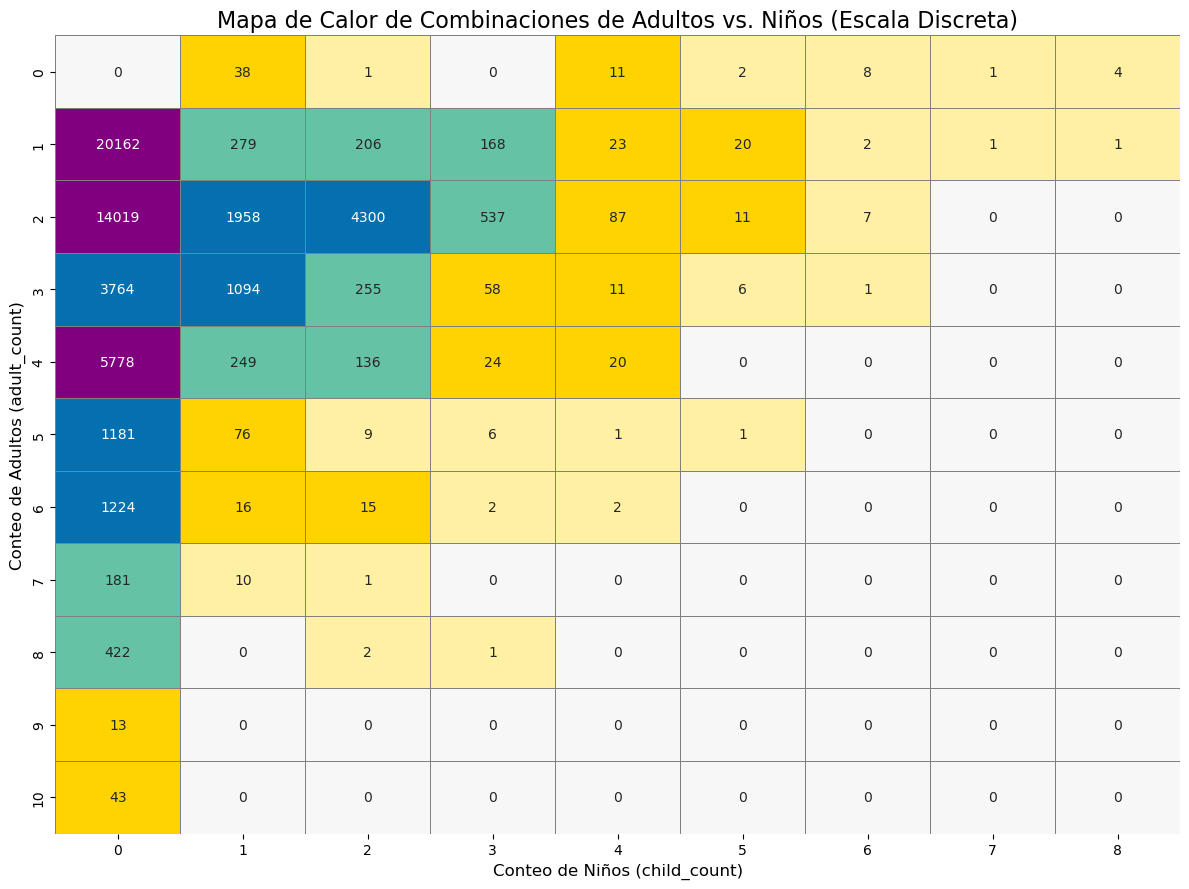

In [27]:
# 2. FUNCIÓN Y CREACIÓN DE LA MATRIZ DE RANGOS
# -----------------------------------------------------------------
def map_to_range_id(count):
    """Mapea el número de reservas a un ID de rango de color discreto."""
    if count == 0:
        return 0  # Rango 0: Cero reservas
    elif 1 <= count <= 10:
        return 1  # Rango 1: 1-10
    elif 10 < count <= 100:
        return 2  # Rango 2: 10-100
    elif 100 < count <= 1000:
        return 3  # Rango 3: 100-1000
    elif 1000 < count <= 5000:
        return 4  # Rango 4: 1000-5000
    else:
        return 5  # Rango 5: 5000+

# Aplicar la función a la matriz de conteos para crear la matriz de rangos (combination_ranges)
combination_ranges = combination_counts.applymap(map_to_range_id)


# 3. VISUALIZACIÓN
# -----------------------------------------------------------------

# --- DEFINICIÓN DE COLORES DISCRETOS ---
# Mismos colores definidos anteriormente (6 colores para los 6 rangos: 0, 1, 2, 3, 4, 5)
colors_list = [
    '#f7f7f7',  # 0: Cero reservas
    '#fff0a3',  # 1: 1-10 (Amarillo claro)
    '#ffd300',  # 2: 10-100 (Oro)
    '#66c2a4',  # 3: 100-1000 (Verde claro)
    '#0570b0',  # 4: 1000-5000 (Azul oscuro)
    '#800080',  # 5: 5000+ (Morado)
]

# Crear un mapa de colores discreto para los 6 valores de rango
custom_cmap = sns.color_palette(colors_list)

plt.figure(figsize=(12, 9))

# Crear el Heatmap
sns.heatmap(
    data=combination_ranges,    # Usamos el DF de rangos para los colores (la matriz que faltaba)
    annot=combination_counts,   # Usamos el DF de conteos para los números
    fmt='d',
    cmap=custom_cmap,
    linewidths=.5,
    linecolor='grey',
    cbar=False                  # Desactivamos la barra de color por ser escala discreta
)

# Añadir etiquetas y título
plt.title('Mapa de Calor de Combinaciones de Adultos vs. Niños (Escala Discreta)', fontsize=16)
plt.xlabel('Conteo de Niños (child_count)', fontsize=12)
plt.ylabel('Conteo de Adultos (adult_count)', fontsize=12)
plt.tight_layout()
plt.show()

In [10]:
# Crear la nueva variable 'has_children'
# Si child_count > 0, es 'Con Hijos', si no, es 'Sin Hijos'
df['has_children'] = df['child_count'].apply(lambda x: 'Con Hijos' if x > 0 else 'Sin Hijos')

# Mostrar las primeras filas para verificar la nueva columna
print("Primeras filas con la nueva variable 'has_children':")
print(df[['child_count', 'has_children']].head(10))

print("\nConteo total de reservas por categoría:")
print(df['has_children'].value_counts())

Primeras filas con la nueva variable 'has_children':
   child_count has_children
0            0    Sin Hijos
1            0    Sin Hijos
2            4    Con Hijos
3            2    Con Hijos
4            0    Sin Hijos
5            1    Con Hijos
6            0    Sin Hijos
7            2    Con Hijos
8            0    Sin Hijos
9            0    Sin Hijos

Conteo total de reservas por categoría:
has_children
Sin Hijos    46787
Con Hijos     9661
Name: count, dtype: int64


C:\Users\jonba\AppData\Local\Temp\ipykernel_26600\3741012340.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


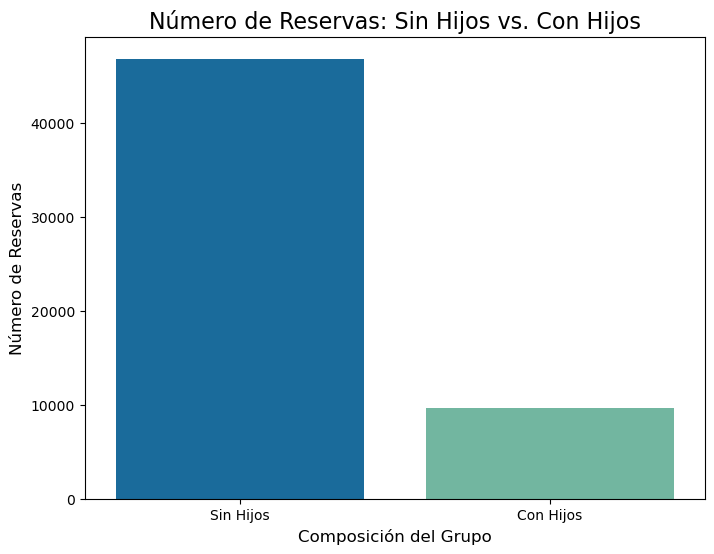

In [11]:
plt.figure(figsize=(8, 6))

# Crear el countplot para la nueva variable
sns.countplot(
    x='has_children',
    data=df,
    palette=['#0570b0', '#66c2a4'], # Azul para Sin Hijos, Verde para Con Hijos
    order=['Sin Hijos', 'Con Hijos'] # Asegurar un orden lógico en el eje X
)

# Añadir etiquetas y título
plt.title('Número de Reservas: Sin Hijos vs. Con Hijos', fontsize=16)
plt.xlabel('Composición del Grupo', fontsize=12)
plt.ylabel('Número de Reservas', fontsize=12)
plt.show()

C:\Users\jonba\AppData\Local\Temp\ipykernel_26600\2330422385.py:84: UserWarning: Glyph 127853 (\N{LOLLIPOP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\jonba\.conda\envs\R6_Amarillo\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127853 (\N{LOLLIPOP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


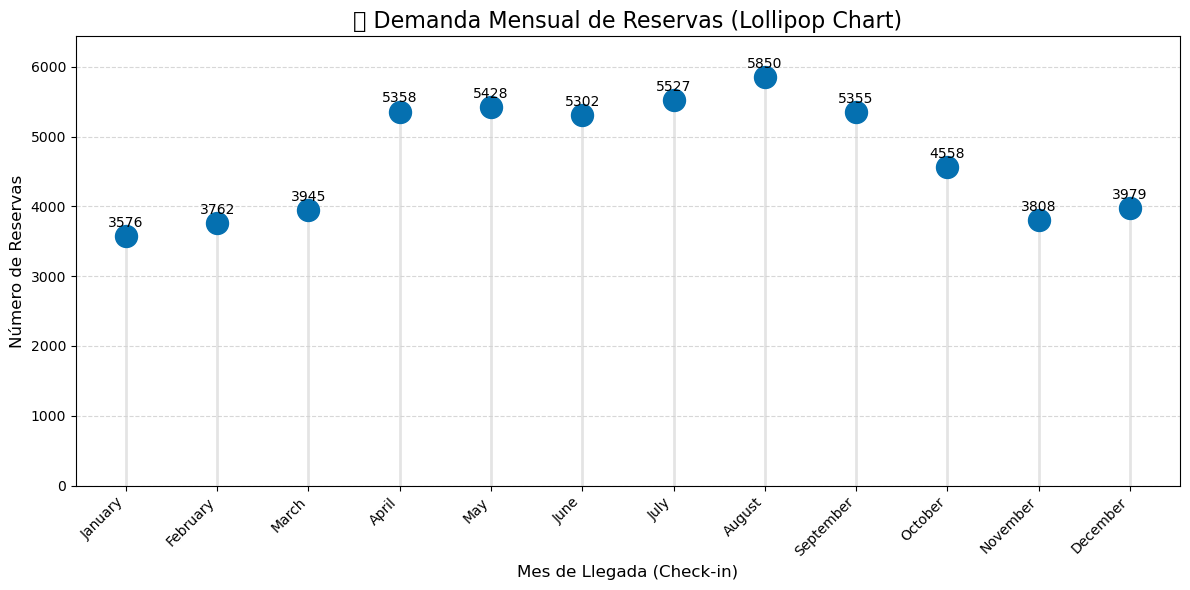

In [12]:
month_order = [
     'January', 'February', 'March', 'April', 'May', 'June',
     'July', 'August', 'September', 'October', 'November', 'December'
]
df['checkin_month'] = pd.Categorical(df['checkin_month'], categories=month_order, ordered=True)
monthly_demand = df['checkin_month'].value_counts().reset_index()
monthly_demand.columns = ['checkin_month', 'reservation_count']
monthly_demand = monthly_demand.sort_values(by='checkin_month')


# --- 2. Creación del Gráfico de Piruleta (Lollipop Chart) ---
plt.figure(figsize=(12, 6))

# Crear los segmentos de línea (el 'palo' de la piruleta)
# Usamos un color gris claro para la línea base
plt.hlines(
    y=monthly_demand['checkin_month'],
    xmin=0,
    xmax=monthly_demand['reservation_count'],
    color='skyblue', # Color más claro para la línea
    alpha=0.4,
    linewidth=2
)

# Crear los puntos (el 'caramelo' de la piruleta)
# Usamos un color azul oscuro para el punto, destacando el valor
plt.scatter(
    x=monthly_demand['reservation_count'],
    y=monthly_demand['checkin_month'],
    color='#0570b0', # Azul oscuro para el punto
    s=250, # Tamaño grande para el punto
    alpha=1
)

# Invertir el eje Y para que los meses vayan de arriba (enero) a abajo (diciembre)
# Esto es opcional, pero a veces facilita la lectura de la secuencia.
# Si prefieres el eje X abajo, puedes usar plt.plot y solo mostrar la línea y el punto
# El código de arriba lo genera en el eje Y para una vista más de ranking.

# Si quieres que se vea como el gráfico de líneas (meses en el eje X):
# Reemplaza el bloque hlines/scatter con:
plt.clf() # Limpia la figura anterior si se ejecutó

# 1. Crear las líneas verticales
plt.vlines(
    x=monthly_demand['checkin_month'],
    ymin=0,
    ymax=monthly_demand['reservation_count'],
    color='lightgray',
    alpha=0.6,
    linewidth=2
)

# 2. Crear los puntos grandes
plt.scatter(
    x=monthly_demand['checkin_month'],
    y=monthly_demand['reservation_count'],
    color='#0570b0',
    s=250, # Tamaño del círculo
    alpha=1,
    zorder=3 # Asegura que el punto esté encima de la línea
)

# Añadir etiquetas de valor encima de cada punto
for index, row in monthly_demand.iterrows():
    plt.text(
        x=row['checkin_month'],
        y=row['reservation_count'] + (monthly_demand['reservation_count'].max() * 0.015), # Ligeramente por encima
        s=f"{row['reservation_count']:.0f}",
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )


# Añadir etiquetas y título
plt.title('🍭 Demanda Mensual de Reservas (Lollipop Chart)', fontsize=16)
plt.xlabel('Mes de Llegada (Check-in)', fontsize=12)
plt.ylabel('Número de Reservas', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, monthly_demand['reservation_count'].max() * 1.1) # Ajustar el límite Y
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [13]:
df['is_cancelled'] = np.where(df['cancelled_at'].notna(), 1, 0)

# Opcional: Mostrar las primeras filas para verificar el resultado
print(df[['cancelled_at', 'is_cancelled']].head())

  cancelled_at  is_cancelled
0          NaN             0
1          NaN             0
2          NaN             0
3          NaN             0
4          NaN             0


In [14]:
# 1. Identificar las 3 tarifas más frecuentes
top_3_rates = df['rate'].value_counts().nlargest(3).index.tolist()

# 2. Crear la nueva columna 'rate_group_top3'
# Asignamos la columna 'rate' original a la nueva columna 'rate_group_top3'
df['rate_group_top3'] = df['rate'].copy()

# 3. Reemplazar los valores que NO están en el Top 3 con 'Others'
# Usamos .isin() para identificar los que están en el Top 3.
# Usamos el operador ~ para INVERTIR la selección (seleccionar los que NO están)
df.loc[~df['rate_group_top3'].isin(top_3_rates), 'rate_group_top3'] = 'Others'

📋 Tasa de Cancelación por Grupo de Tarifa (en %):
                rate_group  cancellation_rate  cancellation_rate_pct
0             Flexible_B&B           0.414432              41.443231
3                   Others           0.308756              30.875638
1        Flexible_RoomOnly           0.306605              30.660479
2  Non_Refundable_RoomOnly           0.105477              10.547694
----------------------------------------


C:\Users\jonba\AppData\Local\Temp\ipykernel_26600\839607584.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


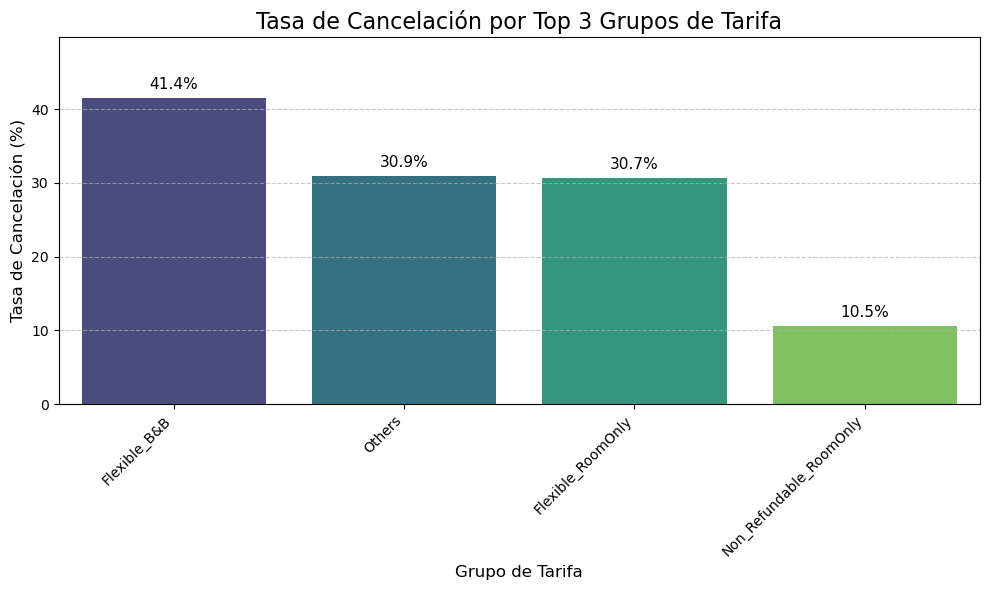

In [15]:
# 1. Calcular la Tasa de Cancelación promedio para cada grupo
# La media de 'is_cancelled' (que es 0 o 1) da directamente la tasa.
cancellation_rate_by_rate = df.groupby('rate_group_top3')['is_cancelled'].mean().reset_index()

# Renombrar la columna para mayor claridad
cancellation_rate_by_rate.columns = ['rate_group', 'cancellation_rate']

# Convertir la tasa a porcentaje (multiplicar por 100)
cancellation_rate_by_rate['cancellation_rate_pct'] = cancellation_rate_by_rate['cancellation_rate'] * 100

# Opcional: Ordenar por la tasa de cancelación (descendente)
cancellation_rate_by_rate = cancellation_rate_by_rate.sort_values(
    by='cancellation_rate_pct',
    ascending=False
)

print("📋 Tasa de Cancelación por Grupo de Tarifa (en %):")
print(cancellation_rate_by_rate)
print("-" * 40)


# 2. Creación del Gráfico de Barras (Bar Plot)
plt.figure(figsize=(10, 6))

# Crear el Bar Plot usando la tasa en porcentaje
ax = sns.barplot(
    x='rate_group',
    y='cancellation_rate_pct',
    data=cancellation_rate_by_rate,
    palette='viridis' # Una paleta de colores vibrante
)

# Añadir etiquetas de valor encima de cada barra
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%",
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center',
               xytext = (0, 10),
               textcoords = 'offset points',
               fontsize=11)


# Añadir etiquetas y título
plt.title('Tasa de Cancelación por Top 3 Grupos de Tarifa', fontsize=16)
plt.xlabel('Grupo de Tarifa', fontsize=12)
plt.ylabel('Tasa de Cancelación (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, cancellation_rate_by_rate['cancellation_rate_pct'].max() * 1.2) # Ajustar límite Y
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()